In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model,svm,preprocessing,metrics,feature_selection,model_selection,tree,impute,ensemble

In [2]:
data = pd.read_csv('train.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
new_data = data.drop(columns = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage',
                                    'GarageYrBlt','GarageType','GarageFinish','GarageCond','GarageQual'])
new_data = new_data.dropna(axis = 0)
new_data = pd.get_dummies(new_data)
x = new_data.drop('SalePrice',axis = 1).values[:,:]
y = new_data['SalePrice'].values[:]

In [4]:
model = model_selection.cross_validate(linear_model.LinearRegression(),x,y,cv = 5)
model

{'fit_time': array([0.41690111, 0.11691999, 0.10063934, 0.12367201, 0.11768508]),
 'score_time': array([0.        , 0.00099826, 0.00099754, 0.00099802, 0.00099945]),
 'test_score': array([0.84486885, 0.82165913, 0.80932301, 0.88250789, 0.64680765])}

In [5]:
ridge_model = linear_model.RidgeCV(cv = 5)
ridge_model.fit(x,y)
print(ridge_model.score(x,y))
print(ridge_model.alpha_)

0.8948656597796806
10.0


In [6]:
model = model_selection.cross_validate(ensemble.GradientBoostingRegressor(),x,y,cv = 5)
model

{'fit_time': array([2.02259517, 1.13297153, 1.30850101, 2.02059937, 1.93183494]),
 'score_time': array([0.00199461, 0.00099754, 0.00099635, 0.00299311, 0.00299358]),
 'test_score': array([0.90092863, 0.81201856, 0.89208529, 0.90582777, 0.89186903])}

In [7]:
new_data = data.drop(columns = ['Id','Street','Alley','Utilities','LandSlope','Condition2',
                            'RoofMatl','ExterCond','Heating','CentralAir','Electrical',
                            'LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath',
                            'BedroomAbvGr','KitchenAbvGr','Functional','FireplaceQu',
                            'GarageType','GarageYrBlt','GarageFinish','GarageQual',
                            'GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF',
                            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC',
                            'Fence','MiscFeature','MiscVal','MoSold','SaleType','SaleCondition',
                            'MSSubClass','LotFrontage','LotArea','GrLivArea','TotRmsAbvGrd',
                            'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea','YearRemodAdd',
                            'OverallCond'])
new_data

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,...,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,FullBath,KitchenQual,Fireplaces,GarageCars,YrSold,SalePrice
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,2003,...,856,Ex,856,854,2,Gd,0,2,2008,208500
1,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,1976,...,1262,Ex,1262,0,2,TA,1,2,2007,181500
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,2001,...,920,Ex,920,866,2,Gd,1,2,2008,223500
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,1915,...,756,Gd,961,756,1,Gd,1,3,2006,140000
4,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,2000,...,1145,Ex,1145,1053,2,Gd,1,3,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,6,1999,...,953,Ex,953,694,2,TA,1,2,2007,175000
1456,RL,Reg,Lvl,Inside,NWAmes,Norm,1Fam,1Story,6,1978,...,1542,TA,2073,0,2,TA,2,2,2010,210000
1457,RL,Reg,Lvl,Inside,Crawfor,Norm,1Fam,2Story,7,1941,...,1152,Ex,1188,1152,2,Gd,2,1,2010,266500
1458,RL,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,1950,...,1078,Gd,1078,0,1,Gd,0,1,2010,142125


In [8]:
def function(x):
    if x == 'Po':
        return 0
    elif x == 'Fa':
        return 1
    elif x == 'TA':
        return 2
    elif x == 'Gd':
        return 3
    elif x == 'Ex':
        return 4

In [9]:
new_data['TotalFlrSF'] = new_data['2ndFlrSF'] + new_data['1stFlrSF']
new_data['ExterQual_rank'] = new_data['ExterQual'].apply(function)
new_data['BsmtQual_rank'] = new_data['BsmtQual'].apply(function)
new_data['KitchenQual_rank'] = new_data['KitchenQual'].apply(function)

new_data = new_data.drop(columns = ['1stFlrSF','2ndFlrSF','KitchenQual','BsmtQual','ExterQual'])
new_data = new_data.dropna(axis = 0)
new_data

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,...,HeatingQC,FullBath,Fireplaces,GarageCars,YrSold,SalePrice,TotalFlrSF,ExterQual_rank,BsmtQual_rank,KitchenQual_rank
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,2003,...,Ex,2,0,2,2008,208500,1710,3,3.0,3
1,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,1976,...,Ex,2,1,2,2007,181500,1262,2,3.0,2
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,2001,...,Ex,2,1,2,2008,223500,1786,3,3.0,3
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,1915,...,Gd,1,1,3,2006,140000,1717,2,2.0,3
4,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,2000,...,Ex,2,1,3,2008,250000,2198,3,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gilbert,Norm,1Fam,2Story,6,1999,...,Ex,2,1,2,2007,175000,1647,2,3.0,2
1456,RL,Reg,Lvl,Inside,NWAmes,Norm,1Fam,1Story,6,1978,...,TA,2,2,2,2010,210000,2073,2,3.0,2
1457,RL,Reg,Lvl,Inside,Crawfor,Norm,1Fam,2Story,7,1941,...,Ex,2,2,1,2010,266500,2340,4,2.0,3
1458,RL,Reg,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,1950,...,Gd,1,0,1,2010,142125,1078,2,2.0,3


<AxesSubplot:>

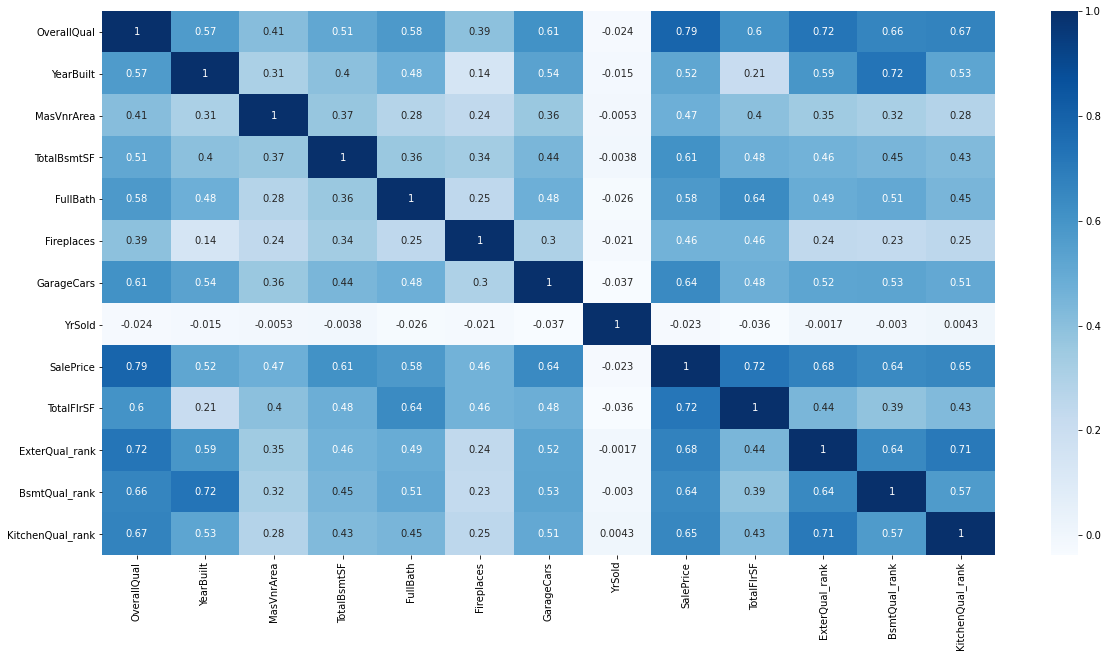

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(new_data.corr(),annot = True,cmap = 'Blues')

In [11]:
new_data = pd.get_dummies(new_data)
new_data

,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,FullBath,Fireplaces,GarageCars,YrSold,SalePrice,TotalFlrSF,...,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,7,2003,196.0,856,2,0,2,2008,208500,1710,...,0,0,0,0,1,1,0,0,0,0
1,6,1976,0.0,1262,2,1,2,2007,181500,1262,...,0,0,0,0,1,1,0,0,0,0
2,7,2001,162.0,920,2,1,2,2008,223500,1786,...,0,0,0,0,1,1,0,0,0,0
3,7,1915,0.0,756,1,1,3,2006,140000,1717,...,0,0,0,0,1,0,0,1,0,0
4,8,2000,350.0,1145,2,1,3,2008,250000,2198,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,0.0,953,2,1,2,2007,175000,1647,...,0,0,0,0,1,1,0,0,0,0
1456,6,1978,119.0,1542,2,2,2,2010,210000,2073,...,0,0,0,1,0,0,0,0,0,1
1457,7,1941,0.0,1152,2,2,1,2010,266500,2340,...,0,0,0,0,1,1,0,0,0,0
1458,5,1950,0.0,1078,1,0,1,2010,142125,1078,...,0,0,0,1,0,0,0,1,0,0


In [12]:
x = new_data.drop('SalePrice',axis = 1).values[:,:]
y = new_data['SalePrice'].values[:]
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,random_state = 0)
print(x.shape)

(1413, 147)


In [13]:
linear_reg_model = model_selection.cross_validate(linear_model.LinearRegression(),x,y,cv = 5)
print(linear_reg_model['test_score'].mean())
linear_reg_model

0.8085141536604084


{'fit_time': array([0.11569142, 0.11170435, 0.1067121 , 0.1057148 , 0.10771251]),
 'score_time': array([0.0009954 , 0.0009973 , 0.00099993, 0.00199485, 0.00199556]),
 'test_score': array([0.86479546, 0.81122821, 0.82920482, 0.83426131, 0.70308096])}

In [14]:
model = model_selection.cross_validate(linear_model.Ridge(alpha = 10),x,y)
model

{'fit_time': array([0.01296687, 0.01296496, 0.01096892, 0.01097059, 0.01097107]),
 'score_time': array([0.0019908 , 0.00199747, 0.00099754, 0.00199413, 0.0009973 ]),
 'test_score': array([0.87469568, 0.82053579, 0.84763134, 0.85028642, 0.70907822])}

In [15]:
model = model_selection.cross_validate(ensemble.GradientBoostingRegressor(),x,y,cv = 5)
model

{'fit_time': array([1.28456497, 1.30052328, 1.47406173, 1.47405553, 1.57478762]),
 'score_time': array([0.00199533, 0.00299597, 0.00199509, 0.00398827, 0.00400686]),
 'test_score': array([0.87608893, 0.82874745, 0.88765112, 0.90692438, 0.86814846])}

In [16]:
forest_model = ensemble.GradientBoostingRegressor()
forest_model.fit(x,y)
linear_reg_model = linear_model.LinearRegression()
linear_reg_model.fit(x,y)

LinearRegression()

In [17]:
test_data = pd.read_csv('test.csv')
test_data['SalePrice'] = 0
test_data = pd.concat([test_data,data],axis = 0)

In [18]:
test_data = test_data.drop(columns = ['Id','Street','Alley','Utilities','LandSlope','Condition2',
                            'RoofMatl','ExterCond','Heating','CentralAir','Electrical',
                            'LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath',
                            'BedroomAbvGr','KitchenAbvGr','Functional','FireplaceQu',
                            'GarageType','GarageYrBlt','GarageFinish','GarageQual',
                            'GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF',
                            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC',
                            'Fence','MiscFeature','MiscVal','MoSold','SaleType','SaleCondition',
                            'MSSubClass','LotFrontage','LotArea','GrLivArea','TotRmsAbvGrd',
                            'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea','YearRemodAdd',
                            'OverallCond'])

In [19]:
test_data['TotalFlrSF'] = test_data['2ndFlrSF'] + test_data['1stFlrSF']
test_data['ExterQual_rank'] = test_data['ExterQual'].apply(function)
test_data['BsmtQual_rank'] = test_data['BsmtQual'].apply(function)
test_data['KitchenQual_rank'] = test_data['KitchenQual'].apply(function)
test_data = test_data.drop(columns = ['1stFlrSF','2ndFlrSF','KitchenQual','BsmtQual','ExterQual'])
test_data = pd.get_dummies(test_data)
test_data = test_data[set(new_data.columns) & set(test_data.columns)]
test_data = test_data.drop('SalePrice',axis = 1)

In [20]:
imp = impute.SimpleImputer(strategy = 'most_frequent')
test_x = imp.fit_transform(test_data.values[:1459,:])
y_pred = forest_model.predict(test_x)
metrics.mean_squared_log_error(sample['SalePrice'].values[:],y_pred)

1.6551398989601065

In [21]:
# submission = pd.DataFrame(
#     {
#         'Id' : list(range(1461,1461 + 1459)),
#         'SalePrice' : y_pred
#     }
# )
# submission
# submission.to_csv('submission.csv',index = False)

In [22]:
y_pred_lin = linear_reg_model.predict(test_x)
len(y_pred_lin[y_pred_lin < 0])
# metrics.mean_squared_log_error(sample['SalePrice'].values[:],y_pred_lin)

1459